In this notebook I will compare the frequency response curves from of frequency dependant volume backscatter with pulse compressed volume backscatter

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import array as arr
import seaborn as sns

import inverse_method_funs as inv

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Pulse compression

Echoview plots and exports pulse-compressed volume backscattering strength (p-c Sv) and LSSS exports volume backscattering strength (Sv).\
The pulse compression is from a type of match filter increases the signal to noise ratio, referred to as spectral amplitude matching. I.e. Trying to find patterns of amplitude in the reflected signal that matches the sent signal (a discrete target/fish). Spectral amplitude matching changes the frequency response (matched filter response) because it increases the weight of the spectral components that show high SNR, like a fish.

In my case, I am working with a continuum of targets, clouds of zooplankton, so I don’t expect each Calanus to produce a distinct peak that the matched filter can pick out. And my method is based on the theory that I am expecting to measure the average echo energy. In the case of a continuum of targets (noise-like, indiscrete targets) the match filtering should have little impact, I think. So for now, I am comfortable using the pulse compressed Sv on a homogenous active layer.
BUT I also have some active layers with discrete targets mixed in. I think here it would be wrong to use pulse compressed Sv because it'll distort the frequency response to have the discrete targets (maybe fish larvae) enhanced over the continuum (cloud of small targets).

# TOC
I want to look at 3 different cases and compare:\
    1. Continuum of targets. Most of what I am interested in. A cloud of zooplankton.\
    2. Empty water. Below where no targets are see of just no targets.\
    3. continuum plus stronger targets. Areas where it looks like a cloud of zooplankton with some strong targets (perhaps cod larvae) scattered in.

## 1. Continuum of targets
My favorite example of this is June 28th 2018 10 AM

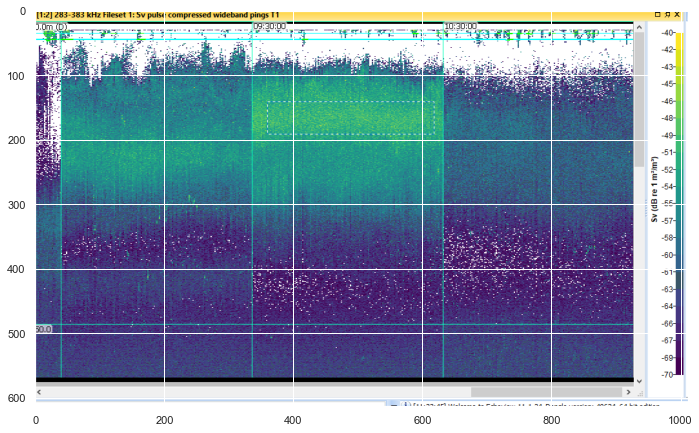

In [3]:
AM_28 = mpimg.imread('./../continuum_28AM.png')
plt.imshow(AM_28)

In [4]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM.csv'
freqs_EV, sv_EV = inv.read_widebandfrequencyresponse(fname_EV, extracols = 2)

Text(0.5, 1.0, 'Pulse-Compressed Frequency response from a continuum of targets')

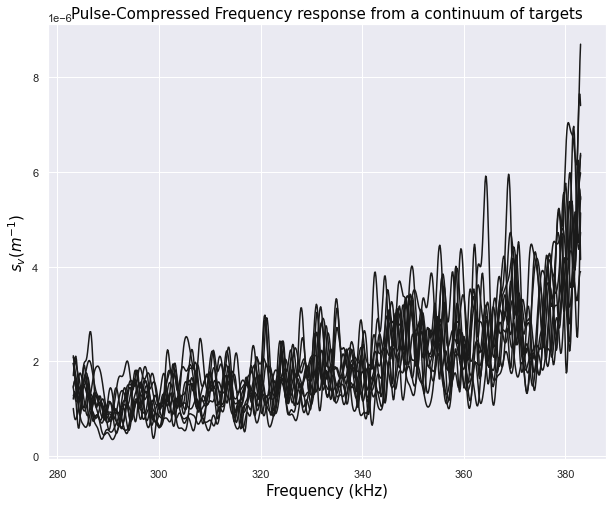

In [5]:
fig=plt.figure(figsize=(10, 8))
plt.plot(freqs_EV ,sv_EV,'k')
plt.ylabel('$s_{v} (m^{-1}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('Pulse-Compressed Frequency response from a continuum of targets', title_font)

In [6]:
fname = 'D:/GLIDER2018/Echosounder/LSSS_Tromsøflaket/Export/BroadbandSv/BroadbandSv_T20180628_10014269-20180628_10054768.json'
freqs, sv_lsss = inv.read_widebandfrequencyresponse(fname, source='LSSS')

KeyError: 'sv'

In [ ]:
fig=plt.figure(figsize=(10, 8))
plt.plot(freqs ,sv_lsss[:,10],'k')
plt.ylabel('$s_{v} (m^{-1}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('PFrequency response from a continuum of targets', title_font)

In [ ]:
np.shape(sv_lsss)